In [3]:
%matplotlib inline

In [60]:
import cv2
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from pathlib import Path
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torchvision import transforms, datasets
from torchvision.datasets import ImageFolder, DatasetFolder
import torchvision.utils as vutils

from utils import render_samples, show_img

In [61]:
render_samples??

In [75]:
path = Path('cifar_samples')

In [76]:
files = [str(f) for f in list(path.iterdir())]
files

['cifar_samples/fake_epoch_6.png',
 'cifar_samples/fake_epoch_3.png',
 'cifar_samples/fake_epoch_12.png',
 'cifar_samples/fake_epoch_9.png',
 'cifar_samples/fake_epoch_18.png',
 'cifar_samples/fake_epoch_0.png',
 'cifar_samples/fake_epoch_15.png']

In [77]:
arrs = [cv2.imread(file) for file in files]

In [78]:
len(arrs)

7

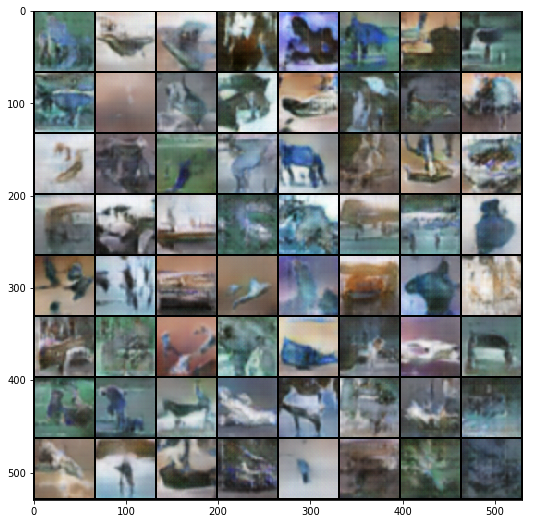

In [29]:
fig, ax = plt.subplots(figsize=(9, 9))
plt.imshow(arrs[2])
plt.show()

In [54]:
arrs[0].shape

(530, 530, 3)

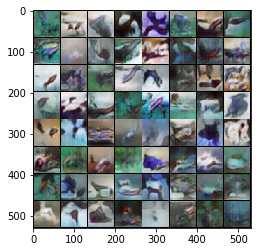

In [56]:
plt.imshow(arrs[0])
plt.show()

In [46]:
tmp = [np.transpose(arr, (1,2,0)) for arr in arrs]

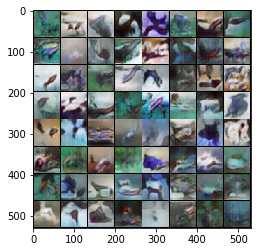

In [49]:
plt.imshow(arrs[0])

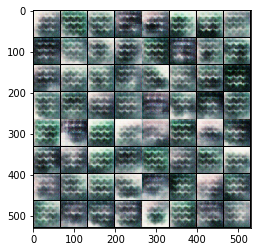

In [59]:
[plt.imshow(arr, animated=True) for arr in arrs]

TypeError: tensor or list of tensors expected, got <class 'numpy.ndarray'>

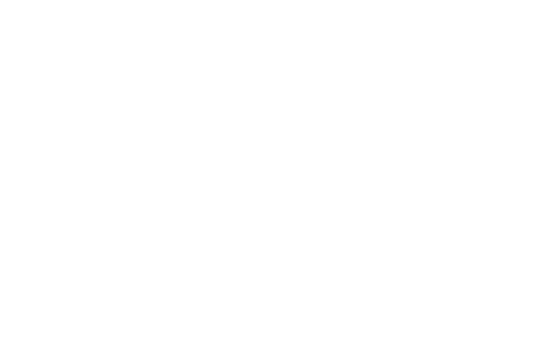

In [79]:
render_samples(arrs, 'cifar.gif')

In [112]:
def render_samples(path, out_file):
    """Render animation from all files in a directory of samples.
    
    Parameters
    -----------
    path: str
        Directory that contains samples images.
    out_files: str
        Location to save new file.
    """
    matplotlib.rcParams['animation.convert_path'] = 'magick'
    fig = plt.figure(figsize=(9, 9))
    plt.axis('off')
    arrs = [cv2.imread(str(file)) for file in Path(path).iterdir()]
    plots = [[plt.imshow(arr, animated=True)] for arr in arrs]
    anim = animation.ArtistAnimation(fig, plots, blit=True, repeat_delay=10, 
                                     repeat=True)
    print(f'Writing file to {out_file}')
    anim.save(out_file, writer='imagemagick', fps=2)

MovieWriter imagemagick unavailable.


Writing file to cifar.gif


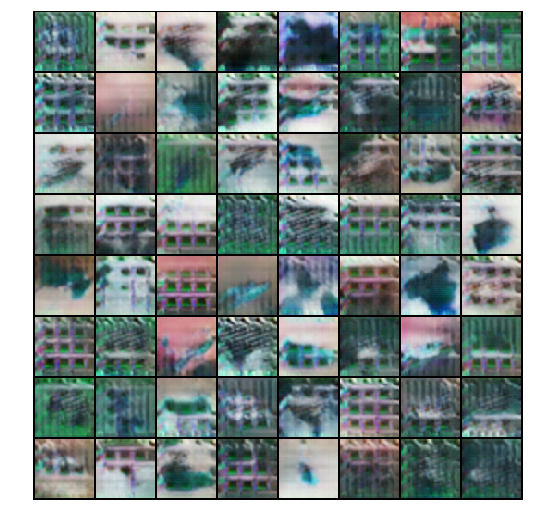

In [113]:
render_samples('cifar_samples', 'cifar.gif')

MovieWriter avconv unavailable.


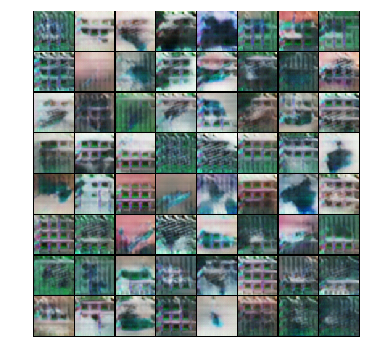

In [100]:
render_samples2(arrs, 'cifar2.gif')

In [101]:
render_samples2??